In [187]:
# import packages
import pandas as pd
import numpy as np
from pdpbox import pdp, info_plots
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
import category_encoders as ce


In [188]:
# dataset loaded
df = pd.read_csv(r"C:\Users\LocalAdmin\OneDrive\Documents\GitHub\dat-07-26\ClassMaterial\Unit3\data\master.csv")

In [189]:
# dataset overview
df.describe()

,visitors,holiday,latitude,longitude,reserve_visitors
count,252108.000000,252108.000000,252108.000000,252108.000000,108394.000000
mean,20.973761,0.050673,35.613121,137.357865,16.699808
std,16.757007,0.219329,2.044473,3.671577,17.388735
min,1.000000,0.000000,33.211967,130.195555,1.000000
25%,9.000000,0.000000,34.692337,135.341564,4.000000
50%,17.000000,0.000000,35.658068,139.670038,10.000000
75%,29.000000,0.000000,35.694003,139.751599,24.000000
max,877.000000,1.000000,44.020632,144.273398,96.000000


In [190]:
# Calendar_date column dropped as it has same significance as 'visit_date'
df.drop('calendar_date', axis=1, inplace=True)

In [191]:
#data visulaization and replacing missing values
df.head() 
df = df.fillna(0)
df

,id,visit_date,visitors,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0
1,air_ba937bf13d40fb24,2016-01-14,32,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0
2,air_ba937bf13d40fb24,2016-01-15,29,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0
3,air_ba937bf13d40fb24,2016-01-16,22,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0
4,air_ba937bf13d40fb24,2016-01-18,6,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0
...,...,...,...,...,...,...,...,...,...,...
252103,air_a17f0778617c76e2,2017-04-21,49,Friday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,6.0
252104,air_a17f0778617c76e2,2017-04-22,60,Saturday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,37.0
252105,air_a17f0778617c76e2,2017-03-26,69,Sunday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,35.0
252106,air_a17f0778617c76e2,2017-03-20,31,Monday,1,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,3.0


In [192]:
# Encoding and pipe creation
te  = ce.TargetEncoder(cols=['id', 'area'])
ore = ce.OrdinalEncoder()
mod = GradientBoostingRegressor(verbose=1, random_state=62)

pipe = make_pipeline(te, ore, mod)

In [193]:
df.sort_values(by=['id', 'visit_date'], inplace=True)

In [194]:
#splitting data 
test = df.groupby('id').apply(lambda x: x.iloc[-20:])
train = df.groupby('id').apply(lambda x: x.iloc[:-20])

In [195]:
train.reset_index(drop=True, inplace=True)

In [196]:
val = train.groupby('id').apply(lambda x: x.iloc[-20:])
train = train.groupby('id').apply(lambda x: x.iloc[:-20])

In [197]:
# 1st iteration of model training with '20' parameter in lambda function
X_train, y_train = train.drop('visitors', axis=1), train['visitors']
X_val, y_val = val.drop('visitors', axis=1), val['visitors']

In [198]:
pipe.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1         251.4027           19.41s
         2         234.4740           19.06s
         3         220.4035           18.62s
         4         208.8742           18.58s
         5         199.3995           18.34s
         6         191.6901           18.30s
         7         185.0553           18.23s
         8         179.6557           18.29s
         9         175.2787           18.01s
        10         171.4905           17.73s
        20         154.2544           14.90s
        30         149.9466           12.90s
        40         148.0279           11.13s
        50         146.6825            9.42s
        60         145.6804            7.55s
        70         144.6961            5.66s
        80         144.1292            3.84s
        90         143.4606            1.92s
       100         143.1271            0.00s


Pipeline(steps=[('targetencoder', TargetEncoder(cols=['id', 'area'])),
                ('ordinalencoder',
                 OrdinalEncoder(cols=['visit_date', 'day_of_week', 'genre'],
                                mapping=[{'col': 'visit_date',
                                          'data_type': dtype('O'),
                                          'mapping': 2016-07-01      1
2016-07-02      2
2016-07-04      3
2016-07-05      4
2016-07-06      5
             ... 
2016-06-23    435
2016-06-30    436
2016-01-01    437
2016-01-02    438
NaN            -2
Length: 439, dtype: int64},
                                         {'col'...
                                         {'col': 'genre',
                                          'data_type': dtype('O'),
                                          'mapping': Italian/French                   1
Izakaya                          2
Dining bar                       3
Cafe/Sweets                      4
Japanese food                    5
West

In [199]:
#val score 1
pipe.score(X_val, y_val)

0.4773954811387482

In [200]:
# 2nd iteration of model training with '50' parameter in lambda function
test = df.groupby('id').apply(lambda x: x.iloc[-50:])
train = df.groupby('id').apply(lambda x: x.iloc[:-50])

In [201]:
train.reset_index(drop=True, inplace=True)

In [202]:
val = train.groupby('id').apply(lambda x: x.iloc[-50:])
train = train.groupby('id').apply(lambda x: x.iloc[:-50])

In [203]:
X_train, y_train = train.drop('visitors', axis=1), train['visitors']
X_val, y_val = val.drop('visitors', axis=1), val['visitors']

In [204]:
pipe.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1         252.5811           12.97s
         2         235.2628           13.13s
         3         221.0976           12.61s
         4         209.2987           12.58s
         5         199.7605           12.46s
         6         191.6621           12.49s
         7         185.1665           12.41s
         8         179.6333           12.36s
         9         175.0796           12.21s
        10         171.3757           12.10s
        20         154.0204           10.58s
        30         149.4415            9.32s
        40         147.3193            8.04s
        50         145.8006            6.77s
        60         144.7905            5.49s
        70         144.0702            4.12s
        80         143.2995            2.75s
        90         142.6577            1.38s
       100         142.2568            0.00s


Pipeline(steps=[('targetencoder', TargetEncoder(cols=['id', 'area'])),
                ('ordinalencoder',
                 OrdinalEncoder(cols=['visit_date', 'day_of_week', 'genre'],
                                mapping=[{'col': 'visit_date',
                                          'data_type': dtype('O'),
                                          'mapping': 2016-07-01      1
2016-07-02      2
2016-07-04      3
2016-07-05      4
2016-07-06      5
             ... 
2016-06-23    435
2016-06-30    436
2016-01-01    437
2016-01-02    438
NaN            -2
Length: 439, dtype: int64},
                                         {'col'...
                                         {'col': 'genre',
                                          'data_type': dtype('O'),
                                          'mapping': Italian/French                   1
Izakaya                          2
Dining bar                       3
Cafe/Sweets                      4
Japanese food                    5
West

In [205]:
#val score 2
pipe.score(X_val, y_val)

0.420523923394336

In [206]:
# 3rd iteration of model training with '10' parameter in lambda function
test = df.groupby('id').apply(lambda x: x.iloc[-10:])
train = df.groupby('id').apply(lambda x: x.iloc[:-10])

In [207]:
train.reset_index(drop=True, inplace=True)

In [208]:
val = train.groupby('id').apply(lambda x: x.iloc[-10:])
train = train.groupby('id').apply(lambda x: x.iloc[:-10])

In [209]:
X_train, y_train = train.drop('visitors', axis=1), train['visitors']
X_val, y_val = val.drop('visitors', axis=1), val['visitors']

In [210]:
pipe.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1         255.9569           21.98s
         2         238.5816           20.43s
         3         224.3729           19.50s
         4         212.5017           19.30s
         5         202.9153           18.98s
         6         194.7884           19.41s
         7         188.0596           19.78s
         8         182.6764           19.99s
         9         178.0873           20.05s
        10         174.3607           19.98s
        20         156.8312           18.90s
        30         152.1323           16.51s
        40         150.0116           13.86s
        50         148.5863           11.50s
        60         147.6668            9.25s
        70         146.7284            7.25s
        80         145.8208            4.87s
        90         145.3149            2.48s
       100         144.8961            0.00s


Pipeline(steps=[('targetencoder', TargetEncoder(cols=['id', 'area'])),
                ('ordinalencoder',
                 OrdinalEncoder(cols=['visit_date', 'day_of_week', 'genre'],
                                mapping=[{'col': 'visit_date',
                                          'data_type': dtype('O'),
                                          'mapping': 2016-07-01      1
2016-07-02      2
2016-07-04      3
2016-07-05      4
2016-07-06      5
             ... 
2016-06-23    435
2016-06-30    436
2016-01-01    437
2016-01-02    438
NaN            -2
Length: 439, dtype: int64},
                                         {'col'...
                                         {'col': 'genre',
                                          'data_type': dtype('O'),
                                          'mapping': Italian/French                   1
Izakaya                          2
Dining bar                       3
Cafe/Sweets                      4
Japanese food                    5
West

In [211]:
#Val score#3: highest score
pipe.score(X_val, y_val)

0.48087395259116683

In [212]:
# trying different criteria of estimators and tree depth
estimators = [100, 150, 200]
tree_depth = [3, 6]
cv_scores  = []

for estimator in estimators:
    for depth in tree_depth:
        pipe[-1].set_params(n_estimators=estimator, max_depth=depth)
        print(f"Fitting for {estimator}, {depth}")
        pipe.fit(X_train, y_train)
        cv_scores.append((pipe.score(X_val, y_val), estimator, depth))

Fitting for 100, 3
      Iter       Train Loss   Remaining Time 
         1         255.9569           22.47s
         2         238.5816           22.68s
         3         224.3729           21.44s
         4         212.5017           20.66s
         5         202.9153           20.27s
         6         194.7884           20.02s
         7         188.0596           19.62s
         8         182.6764           19.32s
         9         178.0873           18.97s
        10         174.3607           18.66s
        20         156.8312           16.74s
        30         152.1323           15.01s
        40         150.0116           12.68s
        50         148.5863           10.51s
        60         147.6668            8.65s
        70         146.7284            6.50s
        80         145.8208            4.32s
        90         145.3149            2.16s
       100         144.8961            0.00s
Fitting for 100, 6
      Iter       Train Loss   Remaining Time 
         1     

In [213]:
cv_scores

[(0.48087395259116683, 100, 3),
 (0.5180888667720436, 100, 6),
 (0.4831959159464144, 150, 3),
 (0.5245092772185987, 150, 6),
 (0.4844736797314231, 200, 3),
 (0.5308543070584251, 200, 6)]

In [214]:
pipe[-1].set_params(n_estimators=200, max_depth=4)

GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=62,
                          verbose=1)

In [215]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

In [216]:
pipe.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1         254.7609            1.10m
         2         236.3161            1.10m
         3         221.2120            1.11m
         4         208.8694            1.20m
         5         198.5256            1.26m
         6         190.2800            1.30m
         7         183.2660            1.31m
         8         177.6737            1.32m
         9         172.8566            1.32m
        10         169.0059            1.32m
        20         152.3754            1.15m
        30         148.6151            1.06m
        40         146.5961           57.87s
        50         144.8612           52.73s
        60         143.7364           47.48s
        70         142.9049           42.92s
        80         142.1095           38.76s
        90         141.5422           34.91s
       100         140.8116           31.39s
       200         136.4520            0.00s


Pipeline(steps=[('targetencoder', TargetEncoder(cols=['id', 'area'])),
                ('ordinalencoder',
                 OrdinalEncoder(cols=['visit_date', 'day_of_week', 'genre'],
                                mapping=[{'col': 'visit_date',
                                          'data_type': dtype('O'),
                                          'mapping': 2016-07-01      1
2016-07-02      2
2016-07-04      3
2016-07-05      4
2016-07-06      5
             ... 
2016-06-23    435
2016-06-30    436
2016-01-01    437
2016-01-02    438
NaN            -2
Length: 439, dtype: int64},
                                         {'col'...
                                          'data_type': dtype('O'),
                                          'mapping': Italian/French                   1
Izakaya                          2
Dining bar                       3
Cafe/Sweets                      4
Japanese food                    5
Western food                     6
Okonomiyaki/Monja/Teppanyak

In [217]:
#Final score
X_test, y_test = test.drop('visitors', axis=1), test['visitors']
pipe.score(X_test, y_test)

0.4802366258764006

Now, let's build our actual PARTIAL DEPENDENCE PLOT.

In [218]:
# for PDP, had to set up days of week 
ore  = ce.OrdinalEncoder(cols=['day_of_week'], mapping = [
    {'col': 'day_of_week', 'mapping': {
        'Monday': 1,
        'Tuesday': 2,
        'Wednesday': 3,
        'Thursday': 4,
        'Friday': 5,
        'Saturday': 6,
        'Sunday':7
    }}
])
# OneHot encoding 
ohe  = ce.OneHotEncoder(cols = ['genre'], use_cat_names=True)
# target encoding to catch rest
pipe = make_pipeline(ore, ohe, ce.TargetEncoder())
# model prediction
mod = GradientBoostingRegressor()
# transform and fit
X_train = pipe.fit_transform(X_train, y_train)
mod.fit(X_train, y_train)

GradientBoostingRegressor()

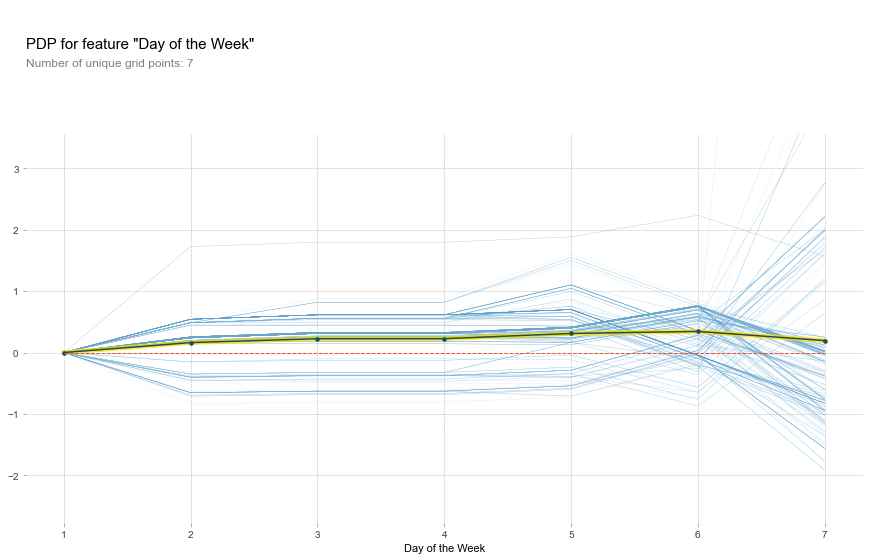

In [219]:
# PDP for feature day_of_week, tried fixing y- axis to adjust  
pdp_day_of_week = pdp.pdp_isolate(
    model=mod, dataset=X_train, model_features=X_train.columns.tolist(), 
    feature='day_of_week', cust_grid_points = X_train['day_of_week'].unique().tolist() 
)

fig, axes = pdp.pdp_plot(pdp_day_of_week, 'Day of the Week', plot_lines=True, frac_to_plot=200)

### PDP for OneHot Encoded Columns

Lots of times your categorical data will be one hot encoded.  PDP plots render a bit more naturally if your data is setup this way, so it's a good idea to keep this in mind if you want to run these plots.  Let's setup our model to one hot encode the `genre` column and see how we can get these values to render.

In [220]:
genre_cols = [col for col in X_train.columns if 'genre' in col]
genre_cols

['genre_Italian/French',
 'genre_Izakaya',
 'genre_Dining bar',
 'genre_Cafe/Sweets',
 'genre_Japanese food',
 'genre_Western food',
 'genre_Okonomiyaki/Monja/Teppanyaki',
 'genre_Other',
 'genre_Yakiniku/Korean food',
 'genre_Asian',
 'genre_Bar/Cocktail',
 'genre_Creative cuisine',
 'genre_International cuisine',
 'genre_Karaoke/Party']

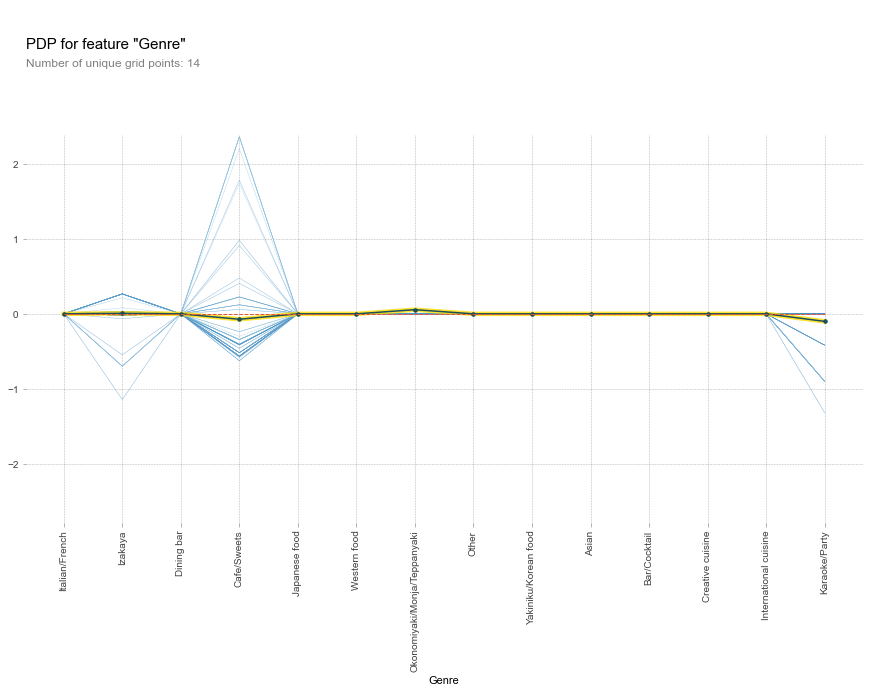

In [221]:
#PDP for genre
pdp_genre = pdp.pdp_isolate(

    model=mod, dataset=X_train, model_features=X_train.columns, 

    feature=genre_cols
)

fig, axes = pdp.pdp_plot(pdp_genre, 'Genre', plot_lines=True, frac_to_plot=100)

xtick_labels = [genre.split('_')[1] for genre in genre_cols]
axes['pdp_ax'].set_xticklabels(xtick_labels, rotation='vertical');